
# Vector Representations
## *Data Science Unit 4 Sprint 1 Assignment 2*

## 0.1 Get `spacy`

In [1]:
# Download en_core_web_md
!python -m spacy download en_core_web_md
# Colab, need to restart runtime after this step!

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 13.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


##0.2 Restart Runtime

## 0.3 Imports

In [1]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.neighbors import NearestNeighbors

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from bs4 import BeautifulSoup

%matplotlib inline

import spacy
nlp = spacy.load("en_core_web_md")

##0.4 Clone the git repo
so we can access the files in the `/data` folder

In [2]:
!git clone https://github.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP.git


Cloning into 'DS-Unit-4-Sprint-1-NLP'...
remote: Enumerating objects: 1746, done.
remote: Counting objects: 100% (214/214), done.
remote: Compressing objects: 100% (126/126), done.
remote: Total 1746 (delta 117), reused 155 (delta 88), pack-reused 1532
Receiving objects: 100% (1746/1746), 60.07 MiB | 21.67 MiB/s, done.
Resolving deltas: 100% (286/286), done.


## 1) Clean the Job Listings from indeed.com that contain the title "Data Scientist"

The file `job_listings.csv` is in the `data` folder for this module. <br>
Navigate to the `data` folder in the `DS-Unit-4-Sprint-1-NLP` folder icon in the left sidebar.
Find the path to `job_listings.csv` (all the way at the bottom of the list of files in `data`), by clicking on the "three dots" symbol to the right of its file icon.

In [4]:
data_path = "/content/DS-Unit-4-Sprint-1-NLP/module2-vector-representations/data/job_listings.csv"
df = pd.read_csv(data_path)

In [5]:
df.head()

,Unnamed: 0,description,title
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist


In [6]:
df.shape

(426, 3)

### Remove `HTML tags`

The text data in the description column is messy - it's full of html tags! <br>
Use the [`BeautifulSoup`](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column by removing html tags. <br>
* You will need to read through the `BeautifulSoup` documentation to accomplish this task. <br>
* As with any library, there is lots of documentation, but read only what you need!
* Don't spend more time than it takes to figure out how to remove html tags!


In [7]:
def remove_html(text):
    """
    Extract text from html boiler plate code.
    Converts bytes dtype into str dtype

    Note
    ----
    Use the regex editor to help you create regular expressions https://regex101.com/

    Parameters
    ----------
    text: string or object
        contains text data that we want to clean

    Returns
    -------
    text: str
        cleaned text data ready for vectorization
    """

    # create soup object
    soup = BeautifulSoup(text, "html.parser")

    # extract text from page using beautiful soup
    # eval will strip off whatever datatype or expression that's inside of a string
    #    see https://docs.python.org/3/library/functions.html#eval for eval docs
    text =  eval(soup.get_text())

    # if text is a byte data type, then convert to string
    if isinstance(text, bytes):

        # convert byte data type into str
        text =  text.decode("utf-8")


    # use regex to clean your text data
    ###BEGIN SOLUTION
    text = re.sub("[^a-zA-Z]", " ", text)
    ###END SOLUTION

    # case normalize and strip extra white spaces on the far left and right hand side
    text = text.lower().lstrip().rstrip()


    return text

In [8]:
df["clean_text"] = df.description.apply(lambda text: remove_html(text))
# would this work? df["clean_text"] = df.description.apply(remove_html)

In [9]:
df.clean_text

0      job requirements  conceptual understanding in ...
1      job description  as a data scientist    you wi...
2      as a data scientist you will be working on con...
3      a monthcontractunder the general supervision o...
4      location  usa   multiple locations    years of...
                             ...                        
421    about us  want to be part of a fantastic and f...
422    internshipat uber  we ignite opportunity by se...
423    a yeara million people a year die in car colli...
424    senior data scientist job description  about u...
425    cerner intelligence is a new  innovative organ...
Name: clean_text, Length: 426, dtype: object

## 2) Use Spacy to tokenize the listings
Remove stop words, punctuation and spaces, and whatever else you want to remove

In [10]:
def tokenizer(text):
    """
    Uses spaCy language model to tokenize text.
    Token filters are used to exclude low quality tokens.

    Note
    ----
    Remember to check out the spacy docs to see which token flags are available for you to use
    https://spacy.io/api/token

    Input
    ----------
    text: string
        raw text document that needs to be tokenized

    Returns
    -------
    tokens: list of strings
    """
    # pass the raw text through the spacy language model
    doc = nlp(text)

    # create a list to store the tokens
    tokens = []

    ###BEGIN SOLUTION
    for token in doc:
        # use the token flags to filter out "low quality" tokens
        if (token.is_stop != True) and (token.is_punct != True) and (token.is_space != True):
            # add the token to the list
            tokens.append(token.lemma_)
    ###END SOLUTION

    return tokens

### Apply our tokenizer function via `pandas.apply()`

In [11]:
df["lemmas"] = df.clean_text.apply(tokenizer)

In [12]:
df["lemmas"]

0      [job, requirement, conceptual, understanding, ...
1      [job, description, data, scientist, help, buil...
2      [data, scientist, work, consult, business, res...
3      [monthcontractunder, general, supervision, pro...
4      [location, usa, multiple, location, year, anal...
                             ...                        
421    [want, fantastic, fun, startup, s, revolutioni...
422    [internshipat, uber, ignite, opportunity, set,...
423    [yeara, million, people, year, die, car, colli...
424    [senior, data, scientist, job, description, am...
425    [cerner, intelligence, new, innovative, organi...
Name: lemmas, Length: 426, dtype: object

## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

- Instantiate a `CountVectorizer` object
- Pass the tokenizer that you created above as a parameter value into `CountVectorizer`
- Use `CountVectorizer` to create a *document-term matrix*
- Copy your *document-term matrix* into a `pandas` dataframe, getting the column names from the `CountVectorizer` object
- Consider using `CountVectorizer` parameters like `stop_words` and `max_df`, `min_df` to trim your results
    
Once you've created your `dtm` dataframe, you might notice that some (or many) of your features result from data that still needs more cleaning. Use this as an opportunity to iteratively improve your `tokenizer` function.

In [13]:
###BEGIN SOLUTION
# COMPLETE THE CODE IN THIS CELL
vect = CountVectorizer(tokenizer=tokenizer, stop_words="english")
dtm_tf = vect.fit_transform(df.clean_text)# Here, tf stands for "term frequency, i.e. counts for each term"
dtm_tf = pd.DataFrame(data=dtm_tf.toarray(), columns=vect.get_feature_names_out())
###END SOLUTION

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [14]:
dtm_tf

,aa,aap,ab,abernathy,ability,able,abound,abroad,absence,absolutely,...,zero,zeus,zf,zheng,zillow,zogsport,zone,zoom,zuckerberg,zurich
0,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
422,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
423,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
424,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 4) Visualize the most common word counts in a barplot

<Axes: title={'center': 'Top 20 Most Common Words in Tech Job Listings'}>

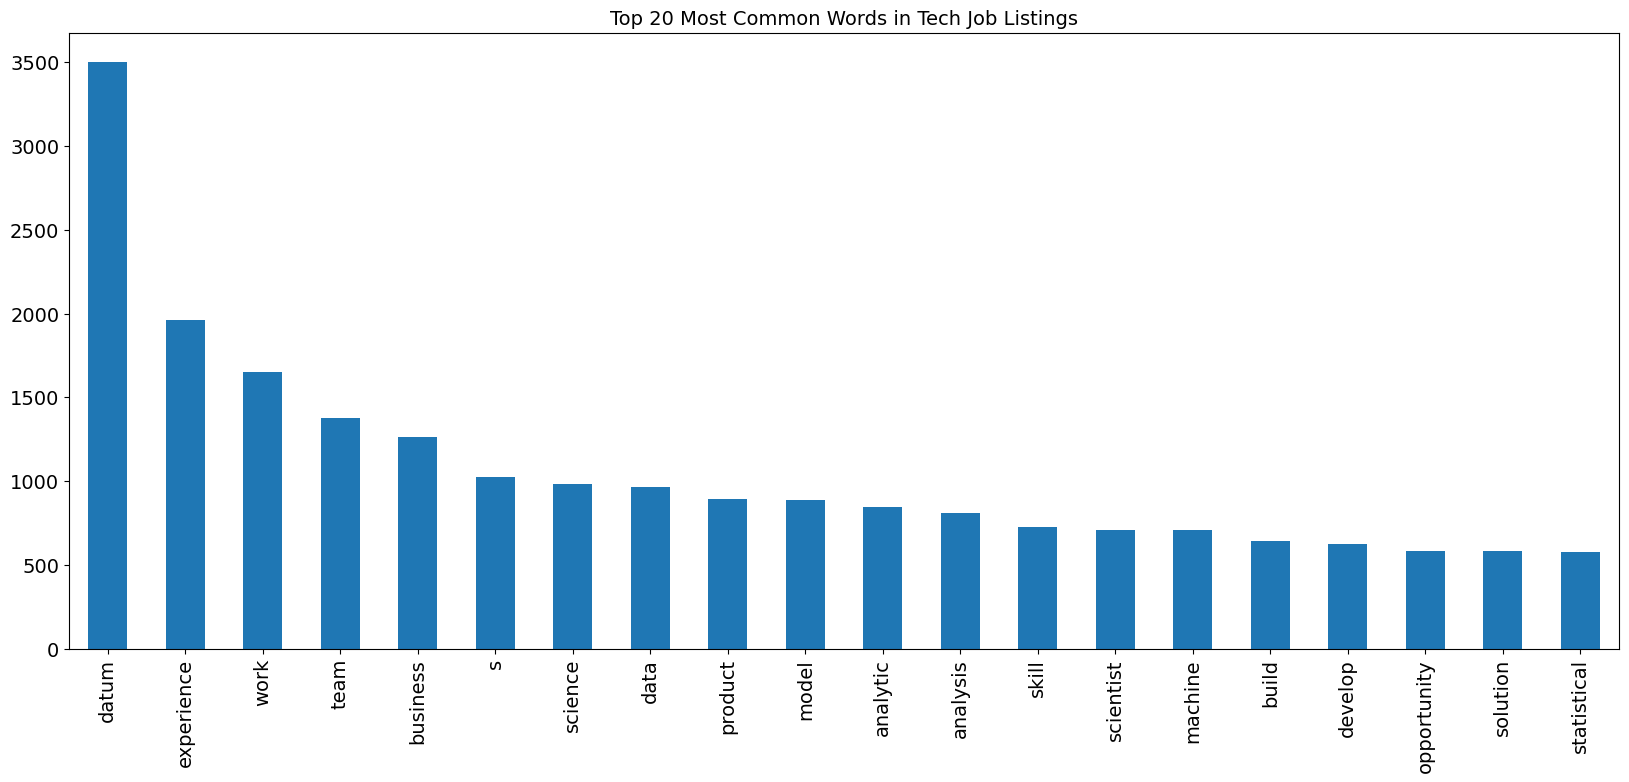

In [15]:
###BEGIN SOLUTION
# COMPLETE THE CODE IN THIS CELL
top_n = 20
# sum the term counts in each column of the dtm_tf data frame and then sort in descending order
sorted_terms = dtm_tf.sum().sort_values(ascending=False)

plt.title("Top {} Most Common Words in Tech Job Listings".format(top_n), fontsize=14)
sorted_terms[:top_n].plot(kind="bar", figsize=(20, 8), fontsize=14)
###END SOLUTION

## 5) Use Scikit-Learn's `TfidfVectorizer` to get a TF-IDF feature matrix

- Instantiate a `TfidfVectorizer` object
- Pass the tokenizer that you created above as a parameter value into `TfidfVectorizer`
- Use `TfidfVectorizer` to create a *document-term matrix*
- Copy your *document-term matrix* into a `pandas` dataframe, getting the column names from the `TfidfVectorizer` object


In [16]:
%%time
###BEGIN SOLUTION

# instantiate the tfidfvectorizer
tfidf = TfidfVectorizer(tokenizer=tokenizer, stop_words="english")

# fit the tfidfvectorizer to the cleaned text
tfidf.fit(df.clean_text)

# transform the cleaned text into a document-term matrix
dtm_tfidf = tfidf.transform(df.clean_text).toarray()
# dtm_tfidf = pd.DataFrame(data=tfidf.transform(df.clean_text).toarray(), columns=tfidf.get_feature_names_out())

###END SOLUTION

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


CPU times: user 1min 28s, sys: 202 ms, total: 1min 28s
Wall time: 1min 29s


In [19]:
dtm_tfidf_df = pd.DataFrame(data=dtm_tfidf, columns=vect.get_feature_names_out())

In [20]:
dtm_tfidf_df

,aa,aap,ab,abernathy,ability,able,abound,abroad,absence,absolutely,...,zero,zeus,zf,zheng,zillow,zogsport,zone,zoom,zuckerberg,zurich
0,0.0,0.0,0.0,0.0,0.091536,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.021707,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.070185,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.114162,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,0.0,0.0,0.0,0.0,0.029442,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
422,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
423,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.105367,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
424,0.0,0.0,0.0,0.0,0.000000,0.067142,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


Stretch: see if you can make a visualization of this TF-IDF Document-Term  matrix, as you did in Part 3 for the CountVectorizer Document-Term matrix, i.e. using a barplot.

## 6) Create a `NearestNeighbor` Model for the Data Science job listings
Write a some text that describes your ideal Data Science job, and query the model to identify jobs with similar descriptions!

In [21]:
ideal_ds_job_query=["""
Seeking someone to fill a fully remote Data Science position.The ideal candidate has at least 2 years of
experience perfor ing the following tasks: taking responsibility for and delivering on end-to-end data science
projects, acquiring data, building ETL pipelines, cleaning and analyzing data, building predictive models,
working with data engineering and software engineering teams. The ideal candidate knows how to work
cross-functionally between teams, prefers working with open source tools but will build their own tools when necessary.
Must have experience with python stack: pandas, numpy, sklearn, keras, tensorflow, matplotlib.
Must have strong software engineering skills. Degree in math, science, engineering strongly preferred.
Must work well with others.
Familiarity with bayesian statistics and deep learning a plus.
"""]

In [22]:
# vectorize your ideal job description using your fitted tfidf vectorizer
ideal_job_vector = tfidf.transform(ideal_ds_job_query).toarray()

# reshape your ideal job vector
#n_cols = ideal_job_vector.shape[1]
#ideal_job_vector = ideal_job_vector.reshape((1, n_cols))

# fit NearestNeighbors model to the Indeed reviews document-term matrix that you created
top_n_neigh = 3
nn = NearestNeighbors(n_neighbors=top_n_neigh)
#nn = NearestNeighbors(n_neighbors=top_n_neigh, metric="cosine")
nn.fit(dtm_tfidf)

# get top_n_neigh distances and review indices for reviews that are closest to your ideal job
distances, indices = nn.kneighbors(ideal_job_vector)

# look at a few of the most similar job descriptions to your ideal job
# Did your query find good matches?
count = 0
for most_sim_job_index in indices[:][0]:
    most_sim_job = df.clean_text[most_sim_job_index]
    count += 1
    print("\n",count," ", most_sim_job)


 1   facebook s mission is to give people the power to build community and bring the world closer together  through our family of apps and services  we re building a different kind of company that connects billions of people around the world  gives them ways to share what matters most to them  and helps bring people closer together  whether we re creating new products or helping a small business expand its reach  people at facebook are builders at heart  our global teams are constantly iterating  solving problems  and working together to empower people around the world to build community and connect in meaningful ways  together  we can help people build stronger communities   we re just getting started  the infrastructure strategy group is responsible for the strategic analysis to support and enable the continued growth critical to facebook s infrastructure organization  the ideal candidate will be passionate about facebook  have strong analytical and modeling aptitude and has experie

## Stretch Goals: do one of more of these that strike your fancy!

 - Repeat Part 6, but this time using spacy's word embeddings to represent documents as vectors. Remember, to form a document vector from spacy word embeddings, you average together the word embedding vectors of all the words in the document, so the document vector will have the same dimensionality as the word embeddings, namely 300 dimensions. Do you notice any difference in the results?
 - Watch Josh Starmer's video [StatQuest: Principal Component Analysis (PCA), Step-by-Step](https://www.youtube.com/watch?v=FgakZw6K1QQ). Or read [Daniela Witten's tweetstorm](https://twitter.com/womeninstat/status/1285610321747611653?lang=en) on Singular Value Decomposition (SVD). Now go back and review the section "Can we visualize word vectors?" from the [lecture video](https://drive.google.com/file/d/1QuwkO2Uj5sONFtqCk0_d2zrks2I6stkN/view?usp=sharing). Write a brief description of your understanding of Principal Components Analysis, and how it was used to visualize word vectors. Do your own experiments to explore relationships of words in two dimensions. Write a summary of what you discovered.

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings?
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. Hint: compose a query that references a number of tech stack items. How are those items distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this; algorithms that depend on Euclidean distance break down with high dimensional data. Do a bit of research to see if you can identify a suitable clustering algorithm.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for.